# Линейная регрессия в SciKit-Learn

Ранее мы видели, как можно построить простую линию тренда. В этой лекции мы значительно расширим спектр наших знаний - поговорим о переобучении (overfitting), недообучении (underfitting), оценке модели, а также об использовании нескольких признаков!

## Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Мы будем использовать данные из книги ISLR (Introduction to Statistical Learning: With Applications in R). Это будут продажи определённого продукта (в тысячах единиц), как функция от бюджета рекламы на ТВ, радио и в газетах (в тысячах долларов).

In [4]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Постановка вопроса

Раньше мы искали ответ на вопрос **Есть ли связь между общими расходами на рекламу и продажами?**, а также пытались предсказывать продажи на основе заданного значения общего бюджета на рекламу. Теперь давайте зададим более широкий вопрос - **Какова связь между каналами рекламы (ТВ, радио, газеты) и продажами?**

### Несколько признаков (N-мерное пространство)

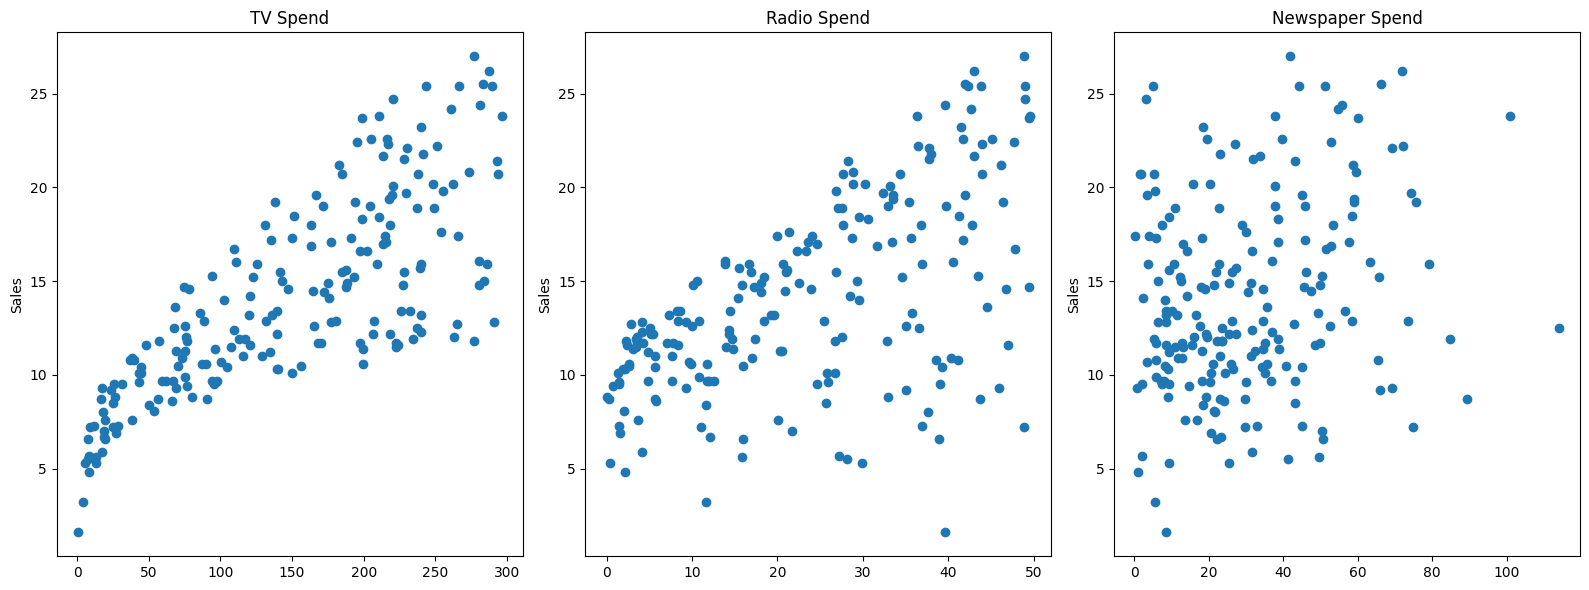

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

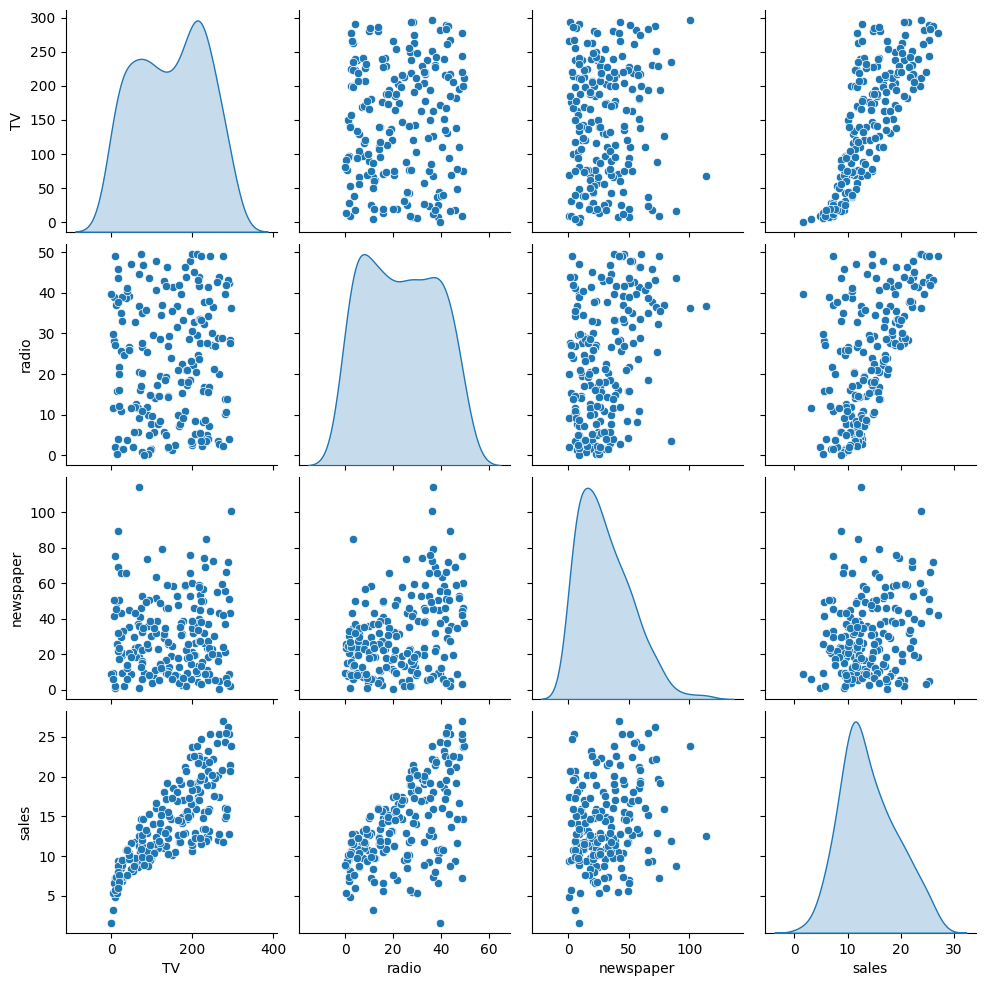

In [6]:
# Связи между признаками
sns.pairplot(df,diag_kind='kde')

## Введение в SciKit Learn

Мы будем очень много работать с библиотекой scitkit learn, так что приготовьтесь работать с синтаксисом "model estimator", а также почитайте очень полезную документацию по этой библиотеке!

---

In [7]:
X = df.drop('sales',axis=1)
y = df['sales']

## Разбиение на обучающую и тестовую выборки - Train | Test Split

Посмотрите видео-лекции про обзор машинного обучения и обучение с учителем (Supervised Learning) - там мы рассказываем, зачем нужен этот шаг.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
X_train.head()

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [15]:
y_train.head()

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

In [13]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [14]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

### Выполняем обучение (Fit/Train) модели на обучающих данных

**Обучение следует проводить не на всех данных, а только на обучающих данных; тогда у нас будет возможность оценить работу модели на тестовых данных, чтобы проверить её способность работать с неизвестными данными в будущем.**

## Создаём модель (в терминах Scikit-Learn это Model Estimator)

#### Импортируем класс модели

In [17]:
from sklearn.linear_model import LinearRegression

#### Создаём экземпляр модели с параметрами

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

# Детали работы модели

-----

## Оценка работы модели на тестовых данных

### Метрики

Более подробно про эти метрики мы рассказываем в видео-лекциях!
Для регрессионных задач наиболее часто используются следующие три метрики:

**Средняя абсолютная ошибка - Mean Absolute Error** (MAE) - усредняет абсолютные значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Среднеквадратическая ошибка - Mean Squared Error** (MSE) - усредняет квадраты ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Среднеквадратическое отклонение - Root Mean Squared Error** (RMSE) - квадратный корень от среднеквадратической ошибки:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Сравнение метрик:

- **MAE** проще всего понять - это просто средняя ошибка.
- **MSE** более популярнее MAE, потому что MSE больше "наказывает" большие ошибки, и обычно это более полезно в прикладных задачах.
- **RMSE** даже ещё более популярна, чем MSE, потому что RMSE измеряется в тех же единицах, что и "y".

Все эти метрики являются **функциями потери (loss functions)**, потому что мы стремимся уменьшить их.

### Вычисляем производительность модели на тестовых данных

Чтобы корректно оценить работу модели, мы вычисляем метрики на тестовом наборе данных (это те данные, которые модель никогда не видела в процессе обучения).

In [16]:
# X_test

In [21]:
# Мы передаём только тестовые данные
# Модель делает предсказания - значения y с крышкой
# Теперь мы можем сравнить предсказанные значения с известными нам истинными значениями y
y_pred = model.predict(X_test)
y_pred

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'MAE:  {MAE}')
print(f'MSE:  {MSE}')
print(f'RMSE: {RMSE}')

MAE:  1.2137457736144803
MSE:  2.2987166978863782
RMSE: 1.516151937599388


In [25]:
df['sales'].mean()

np.float64(14.0225)

**Посмотрите в видео-лекции обсуждение того, насколько эти значения являются "хорошими".**

## Остатки (Residuals)

Квартет Энскомба: [ссылка на википедию](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B5%D1%82_%D0%AD%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D0%B1%D0%B0).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

<table class="wikitable">
<tbody><tr>
<th>Характеристика
</th>
<th>Значение
</th></tr>
<tr>
<td><a href="https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5_%D0%B0%D1%80%D0%B8%D1%84%D0%BC%D0%B5%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5" title="Среднее арифметическое">Среднее значение</a> переменной <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle x}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>x</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle x}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/87f9e315fd7e2ba406057a97300593c4802b53e4" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.33ex; height:1.676ex;" alt="x"/></span>
</td>
<td>9.0
</td></tr>
<tr>
<td><a href="https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B" title="Дисперсия случайной величины">Дисперсия</a> переменной <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle x}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>x</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle x}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/87f9e315fd7e2ba406057a97300593c4802b53e4" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.33ex; height:1.676ex;" alt="x"/></span>
</td>
<td>10,0
</td></tr>
<tr>
<td>Среднее значение переменной <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle y}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>y</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle y}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b8a6208ec717213d4317e666f1ae872e00620a0d" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:1.155ex; height:2.009ex;" alt="y"/></span>
</td>
<td>7,5
</td></tr>
<tr>
<td>Дисперсия переменной <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle y}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>y</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle y}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b8a6208ec717213d4317e666f1ae872e00620a0d" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:1.155ex; height:2.009ex;" alt="y"/></span>
</td>
<td>3,75
</td></tr>
<tr>
<td><a href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F" title="Корреляция">Корреляция</a> между переменными <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle x}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>x</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle x}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/87f9e315fd7e2ba406057a97300593c4802b53e4" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.33ex; height:1.676ex;" alt="x"/></span> и <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle y}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>y</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle y}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b8a6208ec717213d4317e666f1ae872e00620a0d" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:1.155ex; height:2.009ex;" alt="y"/></span>
</td>
<td>0,816
</td></tr>
<tr>
<td>Прямая <a href="https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F" title="Линейная регрессия">линейной регрессии</a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle y=3+0{,}5x}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>y</mi>
        <mo>=</mo>
        <mn>3</mn>
        <mo>+</mo>
        <mn>0</mn>
        <mrow class="MJX-TeXAtom-ORD">
          <mo>,</mo>
        </mrow>
        <mn>5</mn>
        <mi>x</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle y=3+0{,}5x}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/511710bacf47835df1edb292efccc405cd56e85a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:12.558ex; height:2.509ex;" alt="{\displaystyle y=3+0{,}5x}"/></span>
</td></tr>
<tr>
<td><a href="https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8" title="Коэффициент детерминации">Коэффициент детерминации</a> линейной регрессии
</td>
<td>0,67
</td></tr></tbody></table>

In [64]:
quartet = pd.read_csv('anscombes_quartet1.csv')
quartet.head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


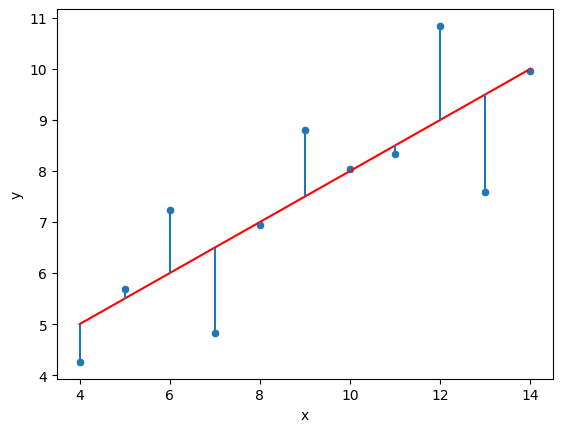

In [26]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<Axes: xlabel='residual', ylabel='Density'>

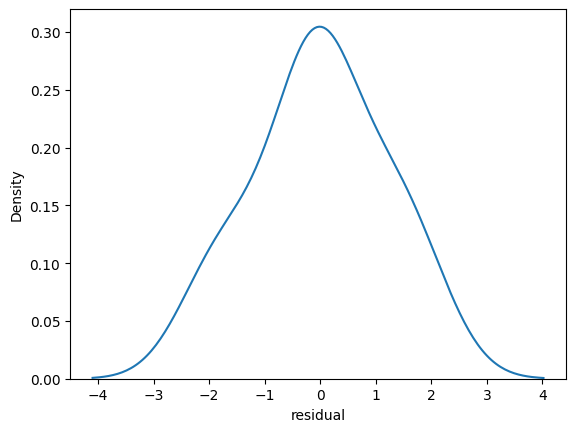

In [27]:
sns.kdeplot(quartet['residual'])

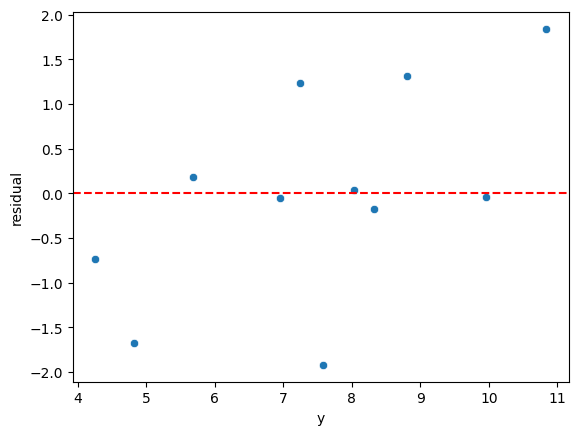

In [28]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

---

In [29]:
quartet = pd.read_csv('anscombes_quartet2.csv')

In [30]:
quartet.columns = ['x','y']

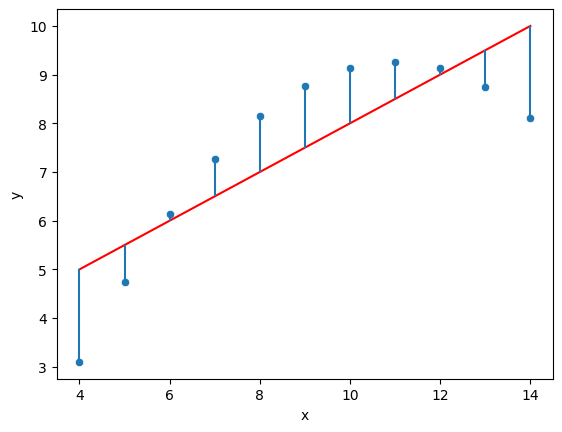

In [31]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']
quartet['residual'] = quartet['y'] - quartet['pred_y']

sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual'])

<Axes: xlabel='residual', ylabel='Density'>

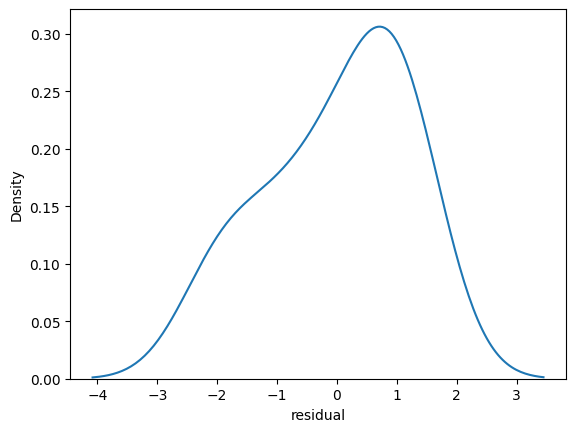

In [32]:
sns.kdeplot(quartet['residual'])

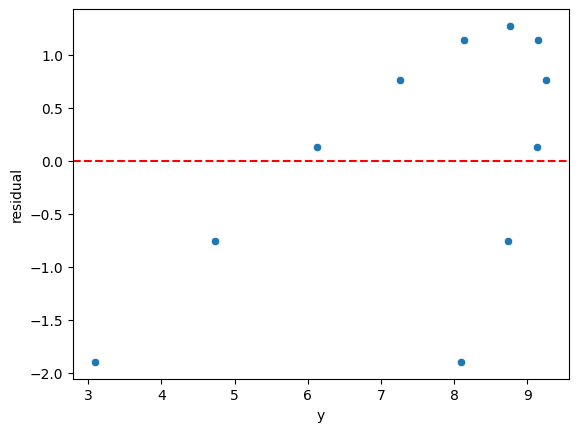

In [33]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--')

In [34]:
quartet = pd.read_csv('anscombes_quartet4.csv')

In [65]:
quartet.head()

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33


In [68]:
# y = 3.00 + 0.500x
quartet['pred_y'] = 3 + 0.5 * quartet['x']

In [69]:
quartet['residual'] = quartet['y'] - quartet['pred_y']

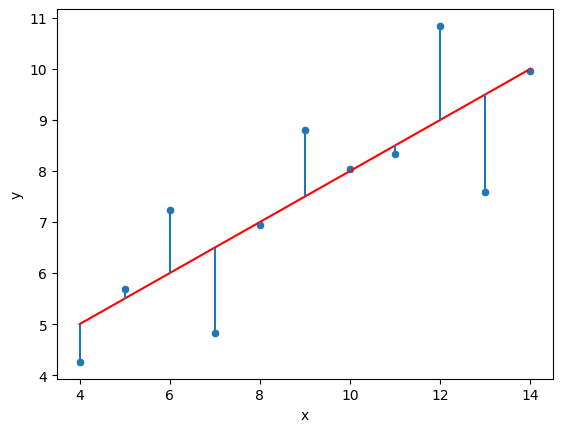

In [71]:
sns.scatterplot(data=quartet,x='x',y='y')
sns.lineplot(data=quartet,x='x',y='pred_y',color='red')
plt.vlines(quartet['x'],quartet['y'],quartet['y']-quartet['residual']);

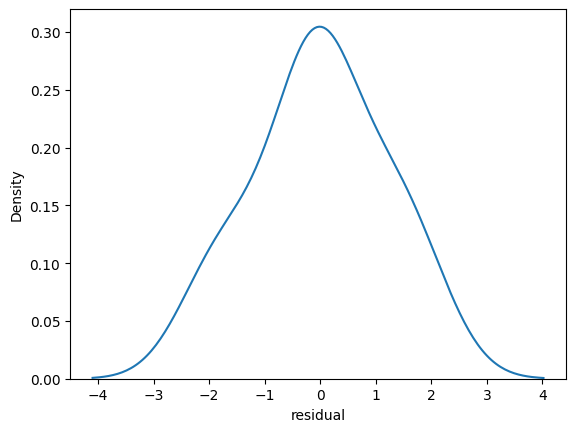

In [72]:
sns.kdeplot(quartet['residual']);

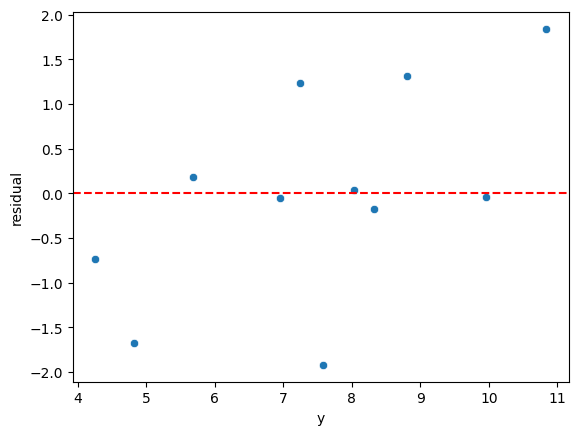

In [73]:
sns.scatterplot(data=quartet,x='y',y='residual')
plt.axhline(y=0, color='r', linestyle='--');

### Наносим остатки на график

Также важно нарисовать график остатков и проверить их нормальное распределение. Это поможет нам определить, насколько оправданно мы выбрали модель линейной регрессии.

In [26]:
# Предсказания на обучающем и тестовом наборах данных.
# Работая с остатками по отдельности, мы можем увидеть, не было ли проблем при разбиении данных с помощью split
y_pred = model.predict(X_test)

In [30]:
# Если бы наша модель была идеальной, то все эти значения были бы нулевыми
y_residuals = y_test - y_pred


np.int64(60)

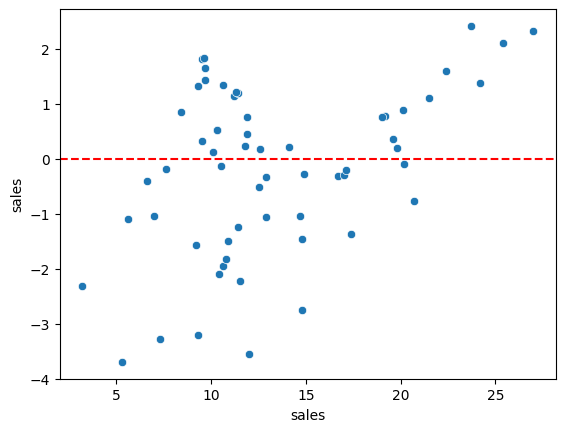

In [32]:
sns.scatterplot(x=y_test, y=y_residuals)
plt.axhline(y=0, color='red', linestyle='--');

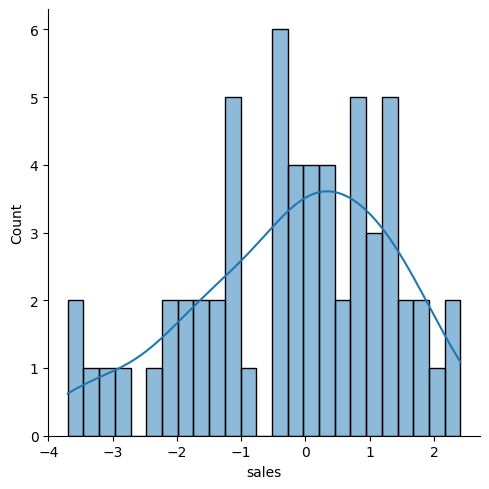

In [35]:
sns.displot(y_residuals, bins=25, kde=True);

Не уверены в том, можно ли считать нормальное распределение хорошей аппроксимацией в этом случае? Давайте посмотрим распределение согласно [этой статье](https://en.wikipedia.org/wiki/Normal_probability_plot).

In [46]:
import scipy as sp

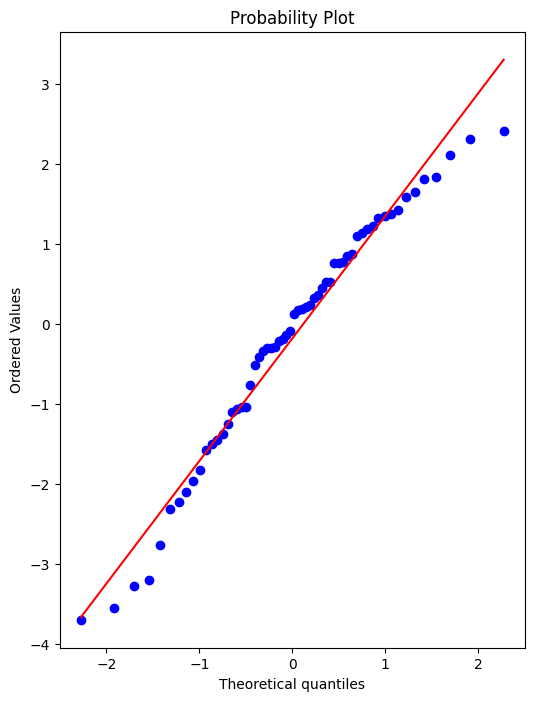

In [47]:
# Создаём объект figure и оси для рисования графика
fig, ax = plt.subplots(figsize=(6,8),dpi=100)

# probplot возвращает значения, которые можно использовать при необходимости
# мы хотим просто нарисовать график, поэтому присваиваем эти значения переменной _
_ = sp.stats.probplot(test_res,plot=ax)

-----------

## Повторное обучение модели на полных данных

Если мы довольны работой модели на тестовых данных, то прежде чем передавать модель в эксплуатацию, мы можем выполнить обучение модели на всех данных. (Если же мы не довольны работой модели на тестовых данных, то мы можем поменять значения параметров или вообще выбрать другую модель - позже мы обсудим это более подробно).

In [38]:
final_model = LinearRegression()
final_model.fit(X,y)
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

Обратите внимание, что здесь уже не имеет смысл заново считать метрику RMSE. Дело в том, что теперь модель увидела все данные, и метрика RMSE уже не будет хорошей оценкой производительности модели, как это было в случае с тестовыми данными.

## Сохранение модели и атрибуты модели

### Финальная модель

Мы можем нарисовать такие графики, потому что признаков всего три. Для большого количества признаков такой подход уже не будет эффективным.

In [39]:
y_hat = final_model.predict(X)

Mu residuals = 1.2520112296870685


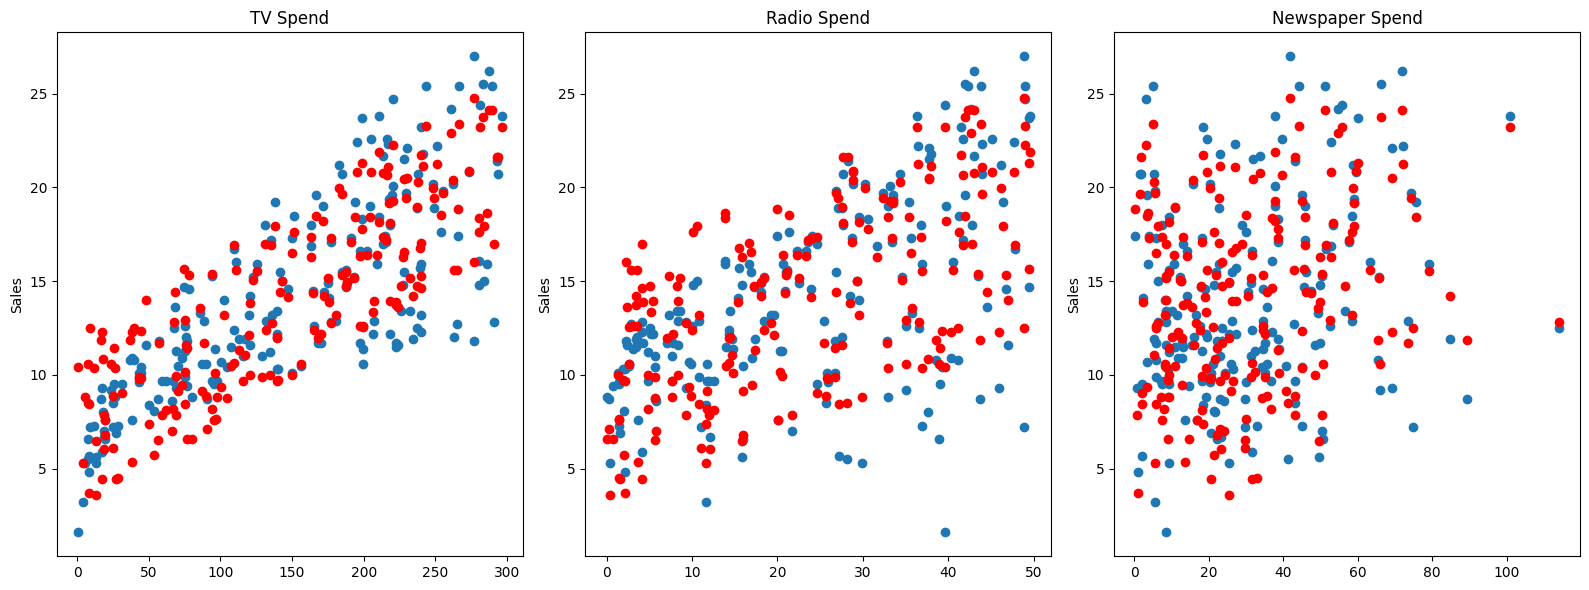

In [60]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

df['residuals'] = y_hat - y
print(f'Mu residuals = {np.mean(abs(df["residuals"]))}')

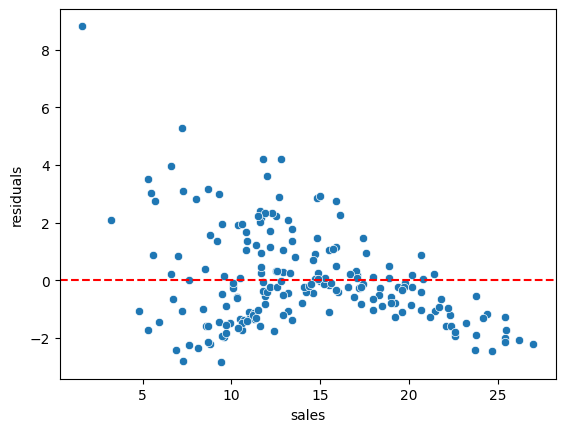

In [61]:
sns.scatterplot(x=y, y=df['residuals'])
plt.axhline(y=0, color='red', linestyle='--')

### Остатки (Residuals)

Как мы обсуждаем в видео-лекции, остатки должны быть нормально распределены.

In [52]:
residuals = y_hat - y

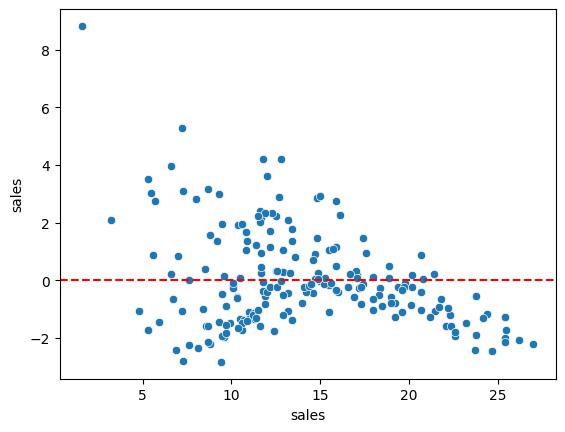

In [53]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

### Коэффициенты

In [54]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [55]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Интерпретация коэффициентов:

---
* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака TV Spend приведёт к увеличению продаж на 0.045 "единиц продаж", в данном случае тысячи единиц. 
* По сути это означает, что на каждые $1000, потраченные на рекламу TV, мы можем ожидать продажи дополнительных 45 единиц товара.
----

---
---
* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака Radio Spend приведёт к увеличению продаж на 0.188  "единиц продаж", в данном случае тысячи единиц.
* По сути это означает, что на каждые $1000, потраченные на рекламу Radio, мы можем ожидать продажи дополнительных 188 единиц товара.
----
----

* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака Newspaper Spend приведёт к **уменьшению** продаж на 0.001 "единиц продаж", в данном случае тысячи единиц. 
* По сути это означает, что на каждые $1000, потраченные на рекламу Newspaper Ads, мы на самом деле ожидаем продать на 1 товар меньше. Поскольку эта цифра так близка к нулю, по сути это означает, что реклама в газетах практически не влияет на продажи.
---
---

**Обратите внимание! В данном примере единицы измерения одинаковы для всех признаков (1 единица измерения равна $1000 рекламного бюджета). Однако в других наборах данных, разные признаки могут иметь разные единицы измерения. Например, в наборе данных о домах - "housing" - мы будем пытаться предсказать цену продажи дома, исходя из признака "количество спален в доме" и признака "общая площадь дома". В таком случае будет полезно *нормализовать* данные для того, чтобы получить сравнимые между собой признаки и результаты. О нормализации мы обязательно поговорим чуть позже.**

In [56]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Предсказания для новых данных

Вспомним - X_test выглядит *в точности* так же, как и новые данные. Так что мы можем просто вызвать метод .predict() для предсказания продаж для новой рекламной кампании.

**В нашей следующей рекламной кампании мы планируем потратить 149k на рекламу на ТВ, 22k на рекламу по радио и 12k на рекламу в газетах. Сколько единиц товара мы ожидаем продать в результате такой рекламы?**

In [62]:
campaign = [[149,22,12]]
final_model.predict(campaign)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

**Насколько это предсказание точное? Очень сложно сказать! Мы знаем только поведение нашей модели на тестовых данных, поэтому нам было важно сначала получить хорошие результаты на тестовых данных прежде, чем обучать модель на всех данных.**

-----

## Сохранение и загрузка модели

In [59]:
from joblib import dump, load

In [60]:
dump(final_model, 'sales_model.joblib') 

['sales_model.joblib']

In [61]:
loaded_model = load('sales_model.joblib')

In [62]:
loaded_model.predict(campaign)

/Users/user/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

## Что дальше?...
### Можно ли как-то улучшить точность модели? Это всё ещё достаточно простая модель, так что давайте добавим дополнительные детали - посмотрим на регуляризацию!

-------
--------